<a href="https://colab.research.google.com/github/AnitaKirkovska/Machine_Learning_Class/blob/master/HW3/t_SNE_Visualization_FineTuned_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Load the fine tuned model**

In [1]:
from google.colab import files

uploaded = files.upload()

Saving cats_and_dogs_fine_1.h5 to cats_and_dogs_fine_1 (2).h5


**Cats and dogs dataset**

In [2]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O /tmp/cats_and_dogs_filtered.zip

--2019-04-17 14:07:40--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.142.128, 2607:f8b0:400e:c08::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.142.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M  65.1MB/s    in 1.0s    

2019-04-17 14:07:42 (65.1 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [0]:
import os
import zipfile

local_zip = '/tmp/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [0]:
base_dir = '/tmp/cats_and_dogs_filtered'

validation_dir = os.path.join(base_dir, 'validation')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
validation_cats_dir = os.path.join(validation_dir, 'cats')

**Preprocessing the image**

In [5]:
from keras.preprocessing.image import ImageDataGenerator

validation_datagen = ImageDataGenerator(rescale=1./255)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

Found 1000 images belonging to 2 classes.


In [21]:
from keras import models
from keras.models import load_model

import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patheffects as PathEffects
import seaborn as sns

model = load_model('cats_and_dogs_fine_1.h5')
model.summary()

layer = model.get_layer('dense_1')
layer_output = layer.output

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg19 (Model)                (None, 4, 4, 512)         20024384  
_________________________________________________________________
flatten_1 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 257       
Total params: 22,122,049
Trainable params: 4,457,473
Non-trainable params: 17,664,576
_________________________________________________________________


In [33]:
activation_model = models.Model(input=model.input, outputs=[layer_output])
activations = activation_model.predict_generator(validation_generator, steps=50)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Update your `Model` call to the Keras 2 API: `Model(outputs=[<tf.Tenso..., inputs=Tensor("vg...)`
  """Entry point for launching an IPython kernel.


In [28]:
activations[0]

array([0.        , 0.        , 1.3857946 , 0.46718287, 0.9988409 ,
       1.9007618 , 0.        , 0.6739104 , 1.0660468 , 0.377705  ,
       1.0243281 , 0.16407932, 0.        , 0.        , 0.77809405,
       1.7218847 , 1.27888   , 1.066199  , 0.        , 1.3585426 ,
       0.        , 1.7084954 , 2.4057398 , 0.        , 1.2082204 ,
       0.27886152, 1.8253751 , 0.7469478 , 0.        , 0.        ,
       1.033526  , 0.57235986, 1.355405  , 1.2412593 , 2.2349951 ,
       0.44032586, 0.        , 0.        , 0.        , 0.88150513,
       1.9704427 , 0.        , 1.0674956 , 2.4967647 , 2.0343146 ,
       1.9671155 , 0.        , 1.0413359 , 0.97507834, 1.0446879 ,
       1.6385794 , 1.4801617 , 0.        , 0.17510267, 1.9444801 ,
       1.1840819 , 2.478857  , 0.48995188, 0.5698147 , 0.99345964,
       2.1256807 , 0.        , 1.5271146 , 1.422771  , 2.4034545 ,
       1.5733149 , 2.991615  , 0.        , 0.        , 0.6965783 ,
       1.890029  , 0.        , 1.7352005 , 0.        , 1.88538

**Feature vector visualization**

In [0]:
def data_scatter(vecs, labels):
 
    num_classes = len(np.unique(labels))
    palette = np.array(sns.color_palette("husl", num_classes))

    # scatter plot.
    f = plt.figure(figsize=(12, 12))
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(vecs[:, 0], vecs[:, 1], c=palette[labels])
    plt.xlim(-25, 25)
    plt.ylim(-25, 25)
    ax.axis('off')
    ax.axis('tight')


    for idx in range(num_classes):

        # Place label at median position of vectors with corresponding label

        x_coord, y_coord = np.median(vecs[labels == idx, :], axis=0)
        txt = ax.text(x_coord, y_coord, class_names[idx], fontsize=16)
        # plot class index black with white contour
        txt.set_path_effects([
            PathEffects.Stroke(linewidth=6, foreground="w"),
            PathEffects.Normal()])

**t-SNE**

In [35]:
from sklearn.manifold import TSNE
import time
time_start = time.time()

dog_cat_tsne = TSNE(random_state=42).fit_transform(activations)

print('t-SNE done! Time elapsed: {} seconds'.format(time.time() - time_start))

t-SNE done! Time elapsed: 8.962589263916016 seconds


**Visualizing**

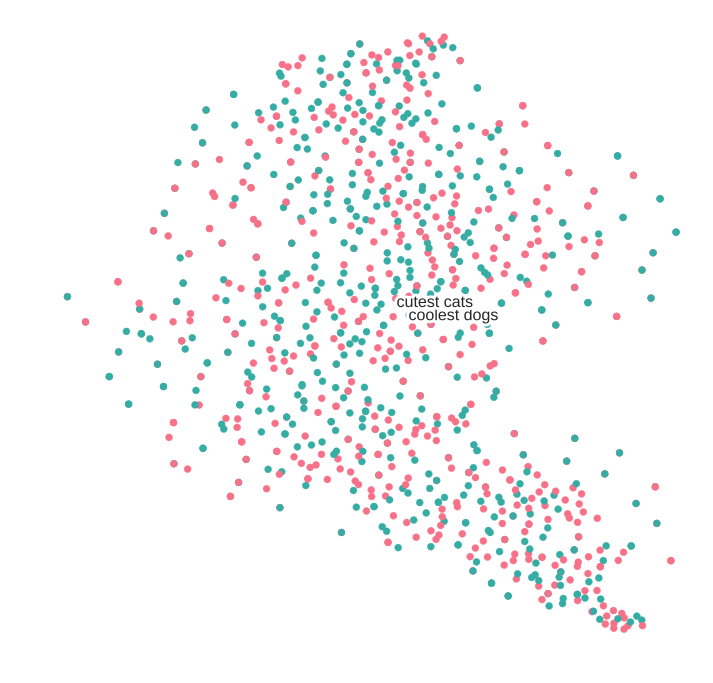

In [36]:
labels = validation_generator.classes
np.random.shuffle(labels)
labels = labels[:1000]
class_names = ['coolest dogs', 'cutest cats']
data_scatter(dog_cat_tsne, labels)